# Penulisan Ilmiah
## Datadiri :
>
> Nama : Muhammad Faqih Hakim
>
> NPM : 51422032

In [ ]:
!pip install -q roboflow

In [ ]:
!pip install -q ultralytics

In [ ]:
import yaml
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
import random
import itertools
from ultralytics import YOLO
from roboflow import Roboflow
import pandas as pd
from google.colab import files
from datetime import datetime

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
rf = Roboflow(api_key="jFj6dO8DDczUZ9kJ1xuo")
project = rf.workspace("kkkk-6bpnc").project("kk-8ucwu")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to kk-2 in yolov8:: 100%|██████████| 14612/14612 [00:01<00:00, 9545.71it/s] 


In [ ]:
train_images_path = "/content/kk-2/train/images"
train_labels_path = "/content/kk-2/train/labels"

In [ ]:
image_files = [f for f in os.listdir(train_images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
sample_files = random.sample(image_files, min(12, len(image_files)))

In [ ]:
def draw_bounding_boxes(img, label_path):
    h, w = img.shape[:2]
    with open("/content/kk-2/data.yaml", 'r') as f:
        data = yaml.safe_load(f)
    class_names = data['names']

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            if line.strip():
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:5])
                x_center *= w
                y_center *= h
                width *= w
                height *= h

                x1 = int(x_center - width / 2)
                y1 = int(y_center - height / 2)
                x2 = int(x_center + width / 2)
                y2 = int(y_center + height / 2)

                color = (0, 255, 0)
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                class_name = class_names[class_id] if class_id < len(class_names) else f"Class_{class_id}"
                text_size, _ = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
                text_y = y1 - 5 if y1 - 5 > text_size[1] else y2 + text_size[1] + 5
                cv2.putText(img, class_name, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    return img

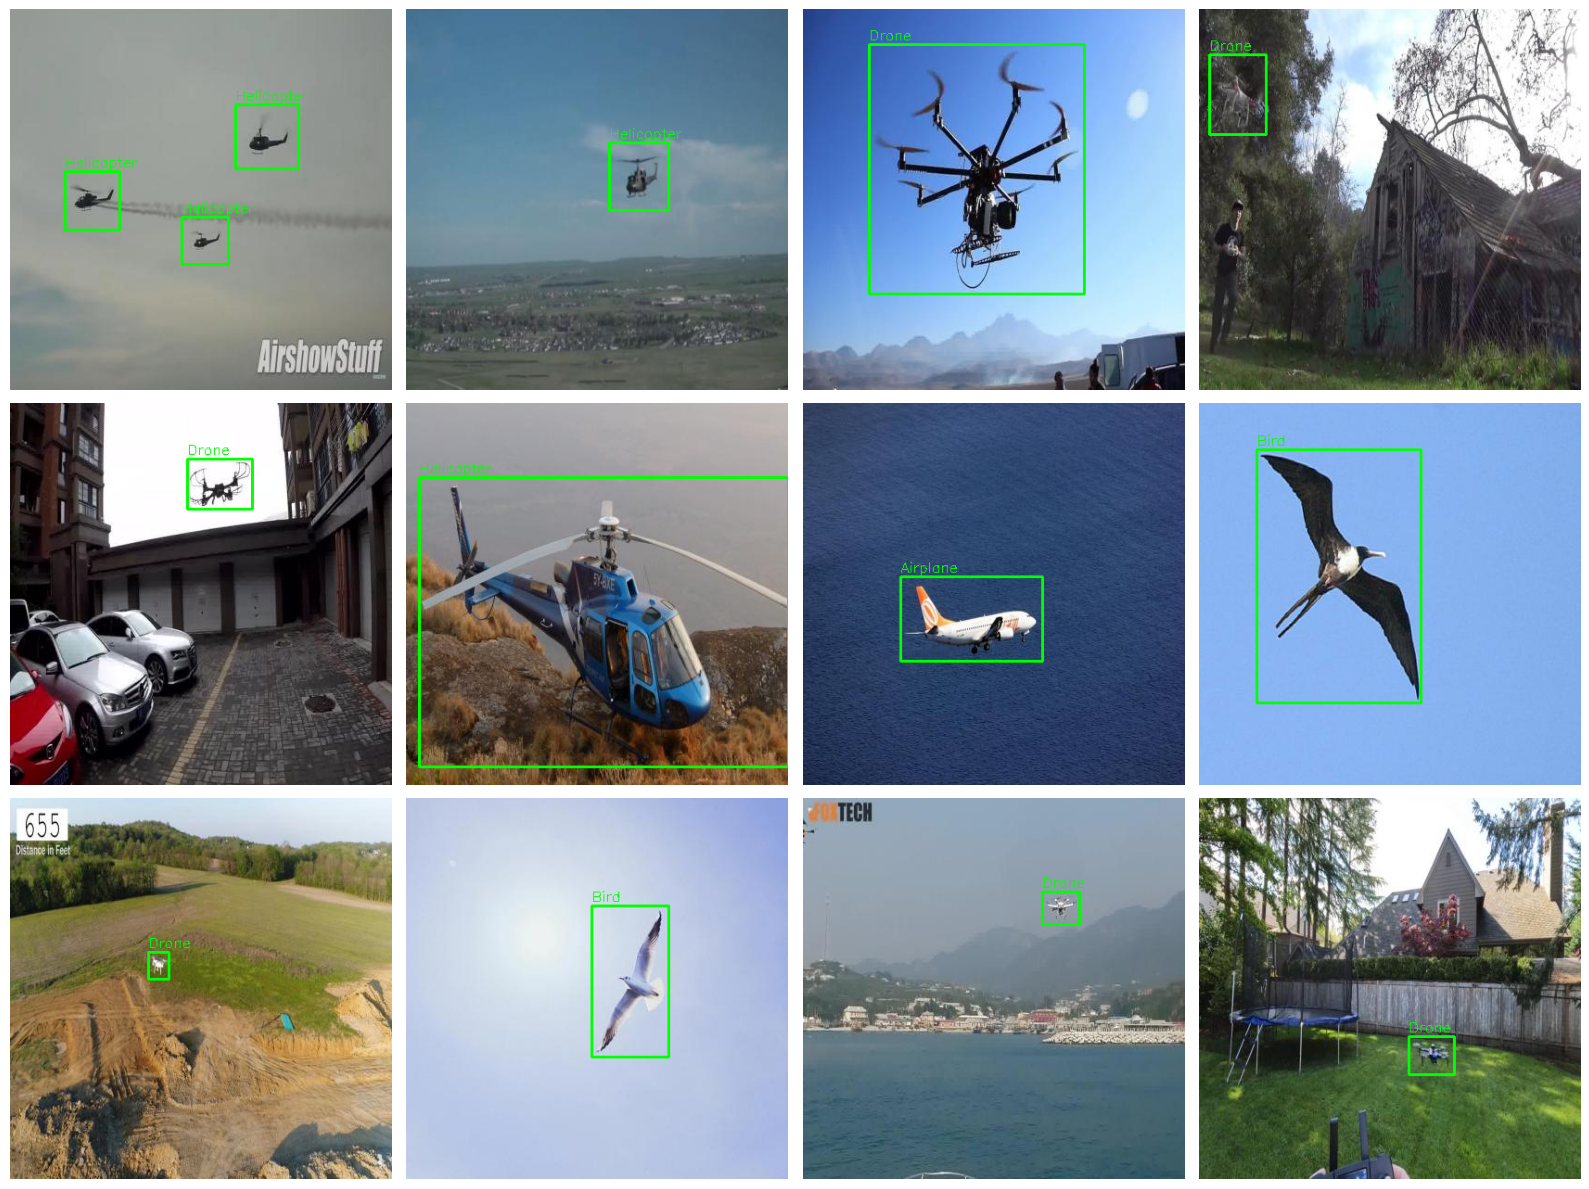

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, img_file in enumerate(sample_files):
    img_path = os.path.join(train_images_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label_file = img_file.rsplit('.', 1)[0] + '.txt'
    label_path = os.path.join(train_labels_path, label_file)

    img = draw_bounding_boxes(img, label_path)

    axes[i].imshow(img)
    axes[i].axis('off')

for i in range(len(sample_files), 12):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
learning_rates = [0.0005, 0.001]
batch_sizes = [8]
weight_decays = [0.0005, 0.001]
optimizers = ['Adam']

In [ ]:
combos = list(itertools.product(learning_rates, batch_sizes, weight_decays, optimizers))
print(f"Total kombinasi: {len(combos)}")
for i, (lr, batch, wd, opt) in enumerate(combos):
    print(f"Kombinasi {i+1}: LR={lr}, Batch={batch}, WD={wd}, Optimizer={opt}")

Total kombinasi: 4
Kombinasi 1: LR=0.0005, Batch=8, WD=0.0005, Optimizer=Adam
Kombinasi 2: LR=0.0005, Batch=8, WD=0.001, Optimizer=Adam
Kombinasi 3: LR=0.001, Batch=8, WD=0.0005, Optimizer=Adam
Kombinasi 4: LR=0.001, Batch=8, WD=0.001, Optimizer=Adam


In [12]:
for i, (lr, batch, weight_decay, optimizer) in enumerate(combos):
    print("=" * 60)
    print(f"Training Model {i+1}/{len(combos)}")
    print(f"Start Time   : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Parameters  : lr={lr}, batch={batch}, weight_decay={weight_decay}, optimizer={optimizer}")
    print(f"Dir Save Name   : run_{i+1}_lr{lr}_b{batch}_wd{weight_decay}_{optimizer}")
    print("=" * 60)

    model = YOLO("yolov9t.pt")

    model.train(
        data="/content/kk-2/data.yaml",
        epochs=15,
        imgsz=640,
        batch=batch,
        lr0=lr,
        optimizer=optimizer,
        weight_decay=weight_decay,

        # Regularization
        warmup_epochs=3,
        dropout=0.1,
        patience=10,

        # Augmentation
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.4,
        degrees=10.0,
        translate=0.1,
        scale=0.5,
        shear=2.0,
        fliplr=0.5,
        mosaic=1.0,
        mixup=0.1,
        copy_paste=0.1,

        # Output
        name=f"YOLOV9_run_{i+1}_lr{lr}_b{batch}_wd{weight_decay}_{optimizer}",
        plots=False,
        save=True,
        save_period=10,
        verbose=False,
        device=0
    )


Training Model 1/4
Start Time   : 2025-06-02 11:38:30
Parameters  : lr=0.0005, batch=8, weight_decay=0.0005, optimizer=Adam
Dir Save Name   : run_1_lr0.0005_b8_wd0.0005_Adam


100%|██████████| 4.74M/4.74M [00:00<00:00, 307MB/s]


Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov9t.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=YOLOV9_run_1_lr0.0005_b8_wd0.0005_Adam, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=10, perspective=0.0, plots=F

100%|██████████| 755k/755k [00:00<00:00, 82.8MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7872  ultralytics.nn.modules.block.ELAN1           [32, 32, 32, 16]              
  3                  -1  1     18560  ultralytics.nn.modules.block.AConv           [32, 64]                      
  4                  -1  1     65216  ultralytics.nn.modules.block.RepNCSPELAN4    [64, 64, 64, 32, 3]           
  5                  -1  1     55488  ultralytics.nn.modules.block.AConv           [64, 96]                      


  6                  -1  1    145824  ultralytics.nn.modules.block.RepNCSPELAN4    [96, 96, 96, 48, 3]           
  7                  -1  1    110848  ultralytics.nn.modules.block.AConv           [96, 128]                     
  8                  -1  1    258432  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 128, 128, 64, 3]        
  9                  -1  1     41344  ultralytics.nn.modules.block.SPPELAN         [128, 128, 64]                
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    158112  ultralytics.nn.modules.block.RepNCSPELAN4    [224, 96, 96, 48, 3]          
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 99.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 493.0±268.6 MB/s, size: 15.4 KB)


train: Scanning /content/kk-2/train/labels... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:02<00:00, 2002.10it/s]


train: New cache created: /content/kk-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 242.0±198.2 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<00:00, 1218.96it/s]

val: New cache created: /content/kk-2/valid/labels.cache


optimizer: Adam(lr=0.0005, momentum=0.937) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/YOLOV9_run_1_lr0.0005_b8_wd0.0005_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.37G      1.496       2.26      1.599         11        640: 100%|██████████| 721/721 [03:45<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.80it/s]


                   all        778        843      0.547      0.448      0.432      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.62G      1.386      1.708      1.547         23        640: 100%|██████████| 721/721 [03:21<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.67it/s]

                   all        778        843      0.764      0.688      0.792       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.63G      1.345      1.544      1.519         19        640: 100%|██████████| 721/721 [03:19<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.64it/s]

                   all        778        843      0.822      0.722      0.831      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.64G      1.299      1.421      1.499         11        640: 100%|██████████| 721/721 [03:18<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.01it/s]

                   all        778        843      0.915      0.816        0.9      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.66G      1.283       1.32      1.487         13        640: 100%|██████████| 721/721 [03:17<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.83it/s]

                   all        778        843      0.945      0.837      0.935       0.58


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.67G       1.09     0.8646       1.37          7        640: 100%|██████████| 721/721 [03:08<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.80it/s]

                   all        778        843      0.946      0.827      0.929      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.68G      1.062     0.7748      1.349          7        640: 100%|██████████| 721/721 [03:08<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.85it/s]

                   all        778        843      0.939      0.866      0.948      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.69G      1.043     0.7108      1.324          8        640: 100%|██████████| 721/721 [03:08<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.91it/s]

                   all        778        843      0.915      0.904      0.953      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.71G      1.025     0.6621      1.311          8        640: 100%|██████████| 721/721 [03:08<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.36it/s]

                   all        778        843      0.949      0.883      0.957      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.72G      1.005     0.6293      1.299          7        640: 100%|██████████| 721/721 [03:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.87it/s]

                   all        778        843      0.926      0.901       0.95      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.73G      0.997     0.5996      1.288          7        640: 100%|██████████| 721/721 [03:09<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.72it/s]

                   all        778        843       0.94      0.917      0.967       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.74G     0.9695     0.5583      1.275          7        640: 100%|██████████| 721/721 [03:07<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.96it/s]

                   all        778        843      0.956      0.943      0.972      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.75G     0.9512     0.5364      1.252          8        640: 100%|██████████| 721/721 [03:07<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.71it/s]

                   all        778        843      0.944      0.926      0.971      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.77G     0.9284     0.5087      1.243          8        640: 100%|██████████| 721/721 [03:07<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.92it/s]

                   all        778        843      0.961       0.94      0.979      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.78G     0.9172     0.4912      1.232          7        640: 100%|██████████| 721/721 [03:07<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.32it/s]

                   all        778        843      0.946      0.942      0.975      0.766



15 epochs completed in 0.844 hours.
Optimizer stripped from runs/detect/YOLOV9_run_1_lr0.0005_b8_wd0.0005_Adam/weights/last.pt, 4.6MB
Optimizer stripped from runs/detect/YOLOV9_run_1_lr0.0005_b8_wd0.0005_Adam/weights/best.pt, 4.6MB

Validating runs/detect/YOLOV9_run_1_lr0.0005_b8_wd0.0005_Adam/weights/best.pt...
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9t summary (fused): 197 layers, 1,971,564 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.21it/s]

                   all        778        843      0.947      0.942      0.975      0.767
Speed: 0.3ms preprocess, 3.5ms inference, 0.0ms loss, 1.6ms postprocess per image


Training Model 2/4
Start Time   : 2025-06-02 12:29:41
Parameters  : lr=0.0005, batch=8, weight_decay=0.001, optimizer=Adam
Dir Save Name   : run_2_lr0.0005_b8_wd0.001_Adam
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov9t.pt, momentum=0.937, mosaic=1.0, multi_scale

train: Scanning /content/kk-2/train/labels.cache... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 250.1±89.1 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels.cache... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<?, ?it/s]


optimizer: Adam(lr=0.0005, momentum=0.937) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.001), 227 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/YOLOV9_run_2_lr0.0005_b8_wd0.001_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.46G       1.48      2.248      1.592         11        640: 100%|██████████| 721/721 [03:43<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.86it/s]

                   all        778        843      0.598      0.466      0.545      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15       1.7G      1.382        1.7      1.531         23        640: 100%|██████████| 721/721 [03:20<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.94it/s]

                   all        778        843       0.79       0.66      0.785      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15       1.7G      1.334      1.537      1.502         19        640: 100%|██████████| 721/721 [03:16<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.86it/s]

                   all        778        843       0.82      0.763      0.864      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15       1.7G       1.29        1.4      1.481         11        640: 100%|██████████| 721/721 [03:18<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.31it/s]

                   all        778        843       0.94      0.784      0.899      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15       1.7G      1.273      1.319      1.471         13        640: 100%|██████████| 721/721 [03:18<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.63it/s]

                   all        778        843      0.884       0.84      0.914      0.587


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15       1.7G      1.088     0.8444      1.357          7        640: 100%|██████████| 721/721 [03:10<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.03it/s]

                   all        778        843      0.931      0.832       0.93      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.78G      1.067     0.7683      1.346          7        640: 100%|██████████| 721/721 [03:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.01it/s]

                   all        778        843      0.928      0.852      0.933      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.78G      1.039     0.7069      1.322          8        640: 100%|██████████| 721/721 [03:08<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.55it/s]

                   all        778        843      0.934       0.87      0.944      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.78G      1.025     0.6662      1.312          8        640: 100%|██████████| 721/721 [03:10<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.96it/s]

                   all        778        843      0.946      0.895      0.954      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.78G      1.011     0.6195      1.294          7        640: 100%|██████████| 721/721 [03:09<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.77it/s]

                   all        778        843      0.931      0.885      0.955      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.78G     0.9915     0.5951      1.274          7        640: 100%|██████████| 721/721 [03:08<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.98it/s]

                   all        778        843      0.953      0.906      0.966      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.78G     0.9647     0.5599      1.263          7        640: 100%|██████████| 721/721 [03:12<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.82it/s]

                   all        778        843      0.951      0.912      0.967      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.78G     0.9507     0.5316      1.253          8        640: 100%|██████████| 721/721 [03:12<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.82it/s]

                   all        778        843      0.966      0.924      0.976      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.78G     0.9338     0.5095      1.243          8        640: 100%|██████████| 721/721 [03:09<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.87it/s]

                   all        778        843      0.948      0.944      0.977      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.78G     0.9149     0.4865      1.225          7        640: 100%|██████████| 721/721 [03:08<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.97it/s]

                   all        778        843      0.955       0.94      0.976      0.761



15 epochs completed in 0.847 hours.
Optimizer stripped from runs/detect/YOLOV9_run_2_lr0.0005_b8_wd0.001_Adam/weights/last.pt, 4.6MB
Optimizer stripped from runs/detect/YOLOV9_run_2_lr0.0005_b8_wd0.001_Adam/weights/best.pt, 4.6MB

Validating runs/detect/YOLOV9_run_2_lr0.0005_b8_wd0.001_Adam/weights/best.pt...
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9t summary (fused): 197 layers, 1,971,564 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  8.29it/s]

                   all        778        843      0.953       0.94      0.976       0.76
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 1.4ms postprocess per image


Training Model 3/4
Start Time   : 2025-06-02 13:20:42
Parameters  : lr=0.001, batch=8, weight_decay=0.0005, optimizer=Adam
Dir Save Name   : run_3_lr0.001_b8_wd0.0005_Adam
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov9t.pt, momentum=0.937, mosaic=1.0, multi_scale=

train: Scanning /content/kk-2/train/labels.cache... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 240.6±115.1 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels.cache... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<?, ?it/s]


optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/YOLOV9_run_3_lr0.001_b8_wd0.0005_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.38G      1.523      2.267      1.671         11        640: 100%|██████████| 721/721 [03:38<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.93it/s]

                   all        778        843      0.419      0.536       0.46      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.63G      1.442      1.791      1.621         23        640: 100%|██████████| 721/721 [03:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.74it/s]

                   all        778        843      0.642      0.602      0.654      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.63G      1.403      1.653      1.597         19        640: 100%|██████████| 721/721 [03:18<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.02it/s]

                   all        778        843      0.822      0.649      0.758      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.63G       1.36      1.554      1.568         11        640: 100%|██████████| 721/721 [03:17<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.94it/s]

                   all        778        843      0.823      0.724      0.819      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.63G      1.344      1.466       1.55         13        640: 100%|██████████| 721/721 [03:16<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.26it/s]

                   all        778        843      0.865       0.84       0.91      0.564


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.63G      1.147     0.9534      1.441          7        640: 100%|██████████| 721/721 [03:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.55it/s]

                   all        778        843      0.881      0.847       0.92      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.63G      1.116      0.852      1.417          7        640: 100%|██████████| 721/721 [03:24<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.38it/s]

                   all        778        843       0.93      0.844      0.926      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.63G      1.098     0.7813      1.402          8        640: 100%|██████████| 721/721 [03:19<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.78it/s]

                   all        778        843      0.919      0.861      0.932      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.63G      1.071     0.7271      1.369          8        640: 100%|██████████| 721/721 [03:07<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.08it/s]

                   all        778        843      0.907      0.864      0.932      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.63G      1.049     0.6821      1.356          7        640: 100%|██████████| 721/721 [03:12<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.92it/s]

                   all        778        843      0.926      0.886      0.947      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.63G      1.028     0.6553      1.333          7        640: 100%|██████████| 721/721 [03:11<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.74it/s]

                   all        778        843       0.93      0.932      0.963      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.63G      1.003     0.6172      1.323          7        640: 100%|██████████| 721/721 [03:10<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.06it/s]

                   all        778        843      0.928      0.924      0.961      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.63G     0.9789     0.5842      1.298          8        640: 100%|██████████| 721/721 [03:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.97it/s]

                   all        778        843      0.954      0.915      0.965      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.63G     0.9502     0.5499      1.285          8        640: 100%|██████████| 721/721 [03:09<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.00it/s]

                   all        778        843       0.96      0.933       0.97      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.64G     0.9403     0.5249       1.27          7        640: 100%|██████████| 721/721 [03:07<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.37it/s]

                   all        778        843      0.947      0.948      0.967      0.739



15 epochs completed in 0.855 hours.
Optimizer stripped from runs/detect/YOLOV9_run_3_lr0.001_b8_wd0.0005_Adam/weights/last.pt, 4.6MB
Optimizer stripped from runs/detect/YOLOV9_run_3_lr0.001_b8_wd0.0005_Adam/weights/best.pt, 4.6MB

Validating runs/detect/YOLOV9_run_3_lr0.001_b8_wd0.0005_Adam/weights/best.pt...
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9t summary (fused): 197 layers, 1,971,564 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.38it/s]

                   all        778        843      0.947      0.948      0.966       0.74
Speed: 0.3ms preprocess, 3.5ms inference, 0.0ms loss, 1.5ms postprocess per image


Training Model 4/4
Start Time   : 2025-06-02 14:12:10
Parameters  : lr=0.001, batch=8, weight_decay=0.001, optimizer=Adam
Dir Save Name   : run_4_lr0.001_b8_wd0.001_Adam
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov9t.pt, momentum=0.937, mosaic=1.0, multi_scale=Fa

train: Scanning /content/kk-2/train/labels.cache... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 211.2±87.6 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels.cache... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<?, ?it/s]


optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.001), 227 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/YOLOV9_run_4_lr0.001_b8_wd0.001_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.38G       1.52      2.261      1.652         11        640: 100%|██████████| 721/721 [03:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.99it/s]

                   all        778        843       0.48      0.485        0.5      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.63G      1.446      1.773      1.603         23        640: 100%|██████████| 721/721 [03:22<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.02it/s]

                   all        778        843       0.63      0.582       0.64      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.63G      1.411      1.659      1.597         19        640: 100%|██████████| 721/721 [03:16<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.96it/s]

                   all        778        843      0.749      0.659      0.747      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.63G      1.368      1.537      1.558         11        640: 100%|██████████| 721/721 [03:20<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.82it/s]

                   all        778        843      0.883      0.731      0.868      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.63G      1.341      1.455      1.546         13        640: 100%|██████████| 721/721 [03:18<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.99it/s]

                   all        778        843      0.845      0.792      0.874      0.546


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.63G      1.147     0.9694       1.44          7        640: 100%|██████████| 721/721 [03:11<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.82it/s]

                   all        778        843      0.855       0.81      0.895      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.63G      1.117     0.8674       1.41          7        640: 100%|██████████| 721/721 [03:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.93it/s]

                   all        778        843      0.907      0.788      0.903      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.63G      1.088     0.7946      1.387          8        640: 100%|██████████| 721/721 [03:10<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.96it/s]

                   all        778        843      0.889      0.863      0.927      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.63G      1.068     0.7229      1.367          8        640: 100%|██████████| 721/721 [03:11<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.78it/s]

                   all        778        843      0.889      0.841      0.912      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.63G      1.044     0.6885      1.344          7        640: 100%|██████████| 721/721 [03:12<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.00it/s]

                   all        778        843       0.91      0.898      0.953      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.63G      1.026     0.6671      1.328          7        640: 100%|██████████| 721/721 [03:10<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.90it/s]

                   all        778        843      0.946       0.89      0.958       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.63G      1.003     0.6234      1.314          7        640: 100%|██████████| 721/721 [03:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.87it/s]

                   all        778        843      0.958      0.876      0.956      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.63G     0.9844     0.5862      1.299          8        640: 100%|██████████| 721/721 [03:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.93it/s]

                   all        778        843      0.952      0.903      0.958      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.64G     0.9558      0.556      1.281          8        640: 100%|██████████| 721/721 [03:11<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.62it/s]


                   all        778        843      0.938      0.927      0.964      0.723

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.64G     0.9423     0.5279       1.27          7        640: 100%|██████████| 721/721 [03:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.41it/s]

                   all        778        843      0.928      0.934      0.962       0.74



15 epochs completed in 0.851 hours.
Optimizer stripped from runs/detect/YOLOV9_run_4_lr0.001_b8_wd0.001_Adam/weights/last.pt, 4.6MB
Optimizer stripped from runs/detect/YOLOV9_run_4_lr0.001_b8_wd0.001_Adam/weights/best.pt, 4.6MB

Validating runs/detect/YOLOV9_run_4_lr0.001_b8_wd0.001_Adam/weights/best.pt...
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9t summary (fused): 197 layers, 1,971,564 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.24it/s]

                   all        778        843      0.928      0.933      0.962      0.741
Speed: 0.3ms preprocess, 3.4ms inference, 0.0ms loss, 1.6ms postprocess per image


In [13]:
base_dir = "/content/runs/detect"
results_summary = []

for run_dir in sorted(os.listdir(base_dir)):
    run_path = os.path.join(base_dir, run_dir)
    results_csv = os.path.join(run_path, "results.csv")

    if os.path.isfile(results_csv):
        df = pd.read_csv(results_csv)

        best_epoch = df["metrics/mAP50-95(B)"].idxmax()
        best_row = df.loc[best_epoch]

        results_summary.append({
            "run_name": run_dir,
            "epoch": int(best_row["epoch"]),
            "mAP_0.5": best_row["metrics/mAP50(B)"],
            "mAP_0.5:0.95": best_row["metrics/mAP50-95(B)"],
            "precision": best_row["metrics/precision(B)"],
            "recall": best_row["metrics/recall(B)"]
        })
    else:
        print(f"di {run_dir} (tidak ada results.csv)")

summary_df = pd.DataFrame(results_summary)
summary_df = summary_df.sort_values(by="mAP_0.5:0.95", ascending=False)


print("\nRingkasan Hasil Evaluasi:")
print(summary_df.to_string(index=False))


Ringkasan Hasil Evaluasi:
                              run_name  epoch  mAP_0.5  mAP_0.5:0.95  precision  recall
YOLOV9_run_1_lr0.0005_b8_wd0.0005_Adam     15  0.97471       0.76613    0.94648 0.94189
 YOLOV9_run_2_lr0.0005_b8_wd0.001_Adam     15  0.97648       0.76057    0.95473 0.94039
  YOLOV9_run_4_lr0.001_b8_wd0.001_Adam     15  0.96196       0.74047    0.92809 0.93351
 YOLOV9_run_3_lr0.001_b8_wd0.0005_Adam     15  0.96650       0.73949    0.94731 0.94821


In [14]:
model_fix = YOLO("/content/runs/detect/YOLOV9_run_1_lr0.0005_b8_wd0.0005_Adam/weights/best.pt")

In [15]:
results = model_fix.val(data='/content/kk-2/data.yaml', split='test', imgsz=640)
print(f"📈 mAP@0.5       : {results.box.map50:.4f}")
print(f"📉 mAP@0.5:0.95  : {results.box.map:.4f}")
print(f"✅ Precision     : {results.box.mp:.4f}")
print(f"🎯 Recall        : {results.box.mr:.4f}")

Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9t summary (fused): 197 layers, 1,971,564 parameters, 0 gradients, 7.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 371.3±179.6 MB/s, size: 19.1 KB)


val: Scanning /content/kk-2/test/labels... 755 images, 0 backgrounds, 0 corrupt: 100%|██████████| 755/755 [00:00<00:00, 2329.22it/s]

val: New cache created: /content/kk-2/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]


                   all        755        813      0.976      0.943      0.978       0.77
              Airplane         53         53      0.971      0.962      0.988      0.815
                  Bird         86         97      0.978      0.923      0.963      0.794
                 Drone        539        573       0.98      0.963      0.989       0.74
            Helicopter         78         90      0.976      0.922      0.971      0.731
Speed: 0.8ms preprocess, 5.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val
📈 mAP@0.5       : 0.9780
📉 mAP@0.5:0.95  : 0.7697
✅ Precision     : 0.9763
🎯 Recall        : 0.9427


📸 Silakan upload file gambar (.jpg/.png):


Saving istockphoto-1332573840-170667a.jpg to istockphoto-1332573840-170667a (1).jpg

image 1/1 /content/istockphoto-1332573840-170667a (1).jpg: 288x640 1 Airplane, 17.4ms
Speed: 1.9ms preprocess, 17.4ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 640)


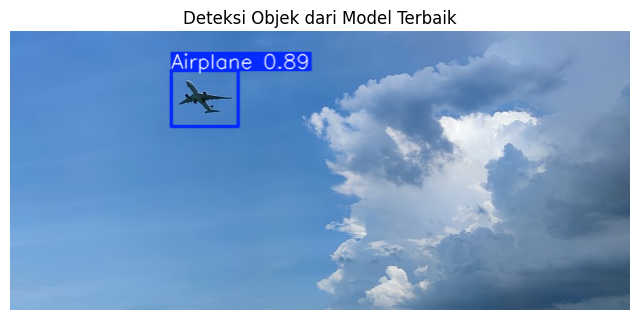

In [22]:
from IPython.display import display

def upload_and_detect():
    print("📸 Silakan upload file gambar (.jpg/.png):")
    uploaded = files.upload()
    image_file = next((f for f in uploaded if f.endswith(('.jpg', '.png'))), None)

    if image_file:
        img = cv2.imread(image_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = model_fix.predict(image_file, imgsz=640, conf=0.25)
        result_img = results[0].plot()
        result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(8, 8))
        plt.imshow(result_img)
        plt.axis('off')
        plt.title("Deteksi Objek dari Model Terbaik")
        plt.show()
    else:
        print("File gambar tidak ditemukan. Silakan upload file dengan ekstensi .jpg atau .png.")

upload_and_detect()

📸 Silakan upload file gambar (.jpg/.png):


Saving drone yolov12.jpg to drone yolov12.jpg

image 1/1 /content/drone yolov12.jpg: 448x640 4 Drones, 20.3ms
Speed: 2.5ms preprocess, 20.3ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


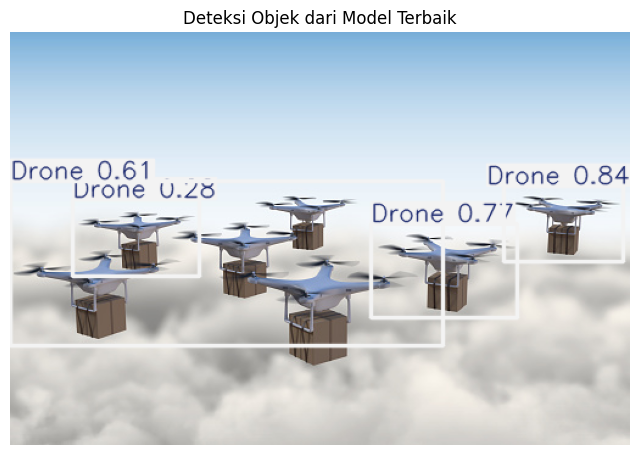

In [20]:
upload_and_detect()

📸 Silakan upload file gambar (.jpg/.png):


Saving 12 heli.jpg to 12 heli.jpg

image 1/1 /content/12 heli.jpg: 384x640 2 Helicopters, 87.7ms
Speed: 3.1ms preprocess, 87.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


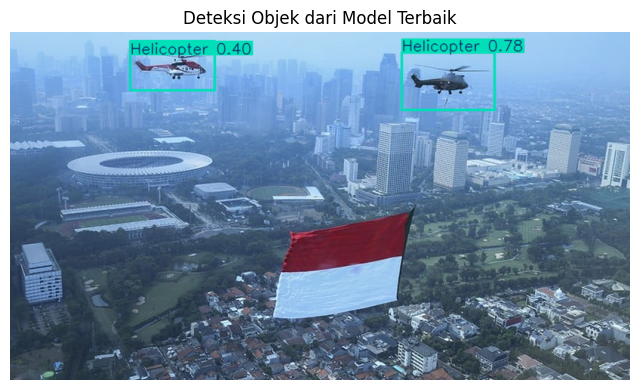

In [21]:
upload_and_detect()

📸 Silakan upload file gambar (.jpg/.png):


Saving burng.jpg to burng.jpg

image 1/1 /content/burng.jpg: 448x640 4 Birds, 1 Helicopter, 17.7ms
Speed: 2.2ms preprocess, 17.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


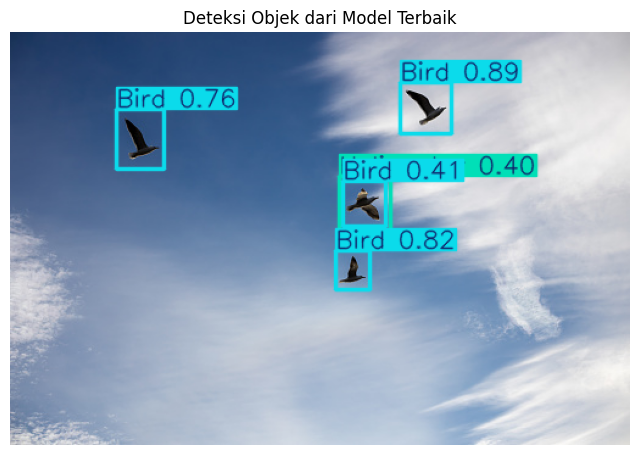

In [19]:
upload_and_detect()